In [1]:
import math
from random import seed
from random import randint
import numpy as np
from PIL import Image
from IPython.display import Image as Im

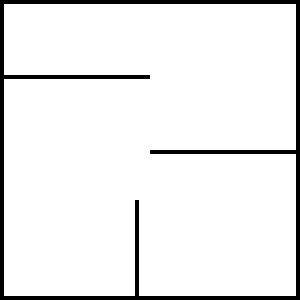

In [2]:
map1 = np.ones([300,300])

for j in range(int(len(map1[0])/2)):
    map1[75][j] = 0
    map1[76][j] = 0
    map1[77][j] = 0
    map1[78][j] = 0
    map1[150][299-j] = 0
    map1[151][299-j] = 0
    map1[152][299-j] = 0
    map1[153][299-j] = 0

for i in range(int(len(map1)/3)):
    map1[299-i][135] = 0
    map1[299-i][136] = 0
    map1[299-i][137] = 0
    map1[299-i][138] = 0
    
for j in range(int(len(map1[0]))):
    map1[0][j] = 0 
    map1[1][j] = 0 
    map1[2][j] = 0 
    map1[3][j] = 0 
    map1[299][j] = 0 
    map1[298][j] = 0 
    map1[297][j] = 0 
    map1[296][j] = 0 
    
for i in range(int(len(map1))):
    map1[i][0] = 0
    map1[i][1] = 0
    map1[i][2] = 0
    map1[i][3] = 0
    map1[i][299] = 0
    map1[i][298] = 0
    map1[i][297] = 0
    map1[i][296] = 0

imagearray = (map1*255).astype(np.uint8)
img = Image.fromarray(imagearray)
img.save('map1.png')

Im(filename='map1.png') 

In [3]:
def isvalidindex(index):
    if index<0:
        return 0
    
    elif index>299:
        return 0
    
    else:
        return 1

In [4]:
def obstacle(x_co,y_co,sensor_range,x_obs,y_obs,sensor_out):
    
    if(y_co!=y_obs):
        
        tan_theta = -1*(x_obs-x_co)/(y_obs-y_co)
        
        for a in range(sensor_range):
            
            index = y_obs - y_co + np.sign(y_obs-y_co)*a
            
            if(sensor_range+index>=0 and sensor_range+index<2*sensor_range+1 and sensor_range+np.floor(tan_theta*index)>=0 and sensor_range+np.floor(tan_theta*index)<2*sensor_range+1):
                
                sensor_out[sensor_range-int(np.floor(tan_theta*index))][sensor_range+index] = 0
                
                if(sensor_range+index>=0 and sensor_range+index<2*sensor_range+1 and sensor_range+np.ceil(tan_theta*index)>=0 and sensor_range+np.ceil(tan_theta*index)<2*sensor_range+1):
                
                    sensor_out[sensor_range-int(np.ceil(tan_theta*index))][sensor_range+index] = 0
            
            elif(sensor_range+index>=0 and sensor_range+index<2*sensor_range+1 and sensor_range+np.ceil(tan_theta*index)>=0 and sensor_range+np.ceil(tan_theta*index)<2*sensor_range+1):
                
                sensor_out[sensor_range-int(np.ceil(tan_theta*index))][sensor_range+index] = 0
            
            else:
                continue
                
    elif(y_co==y_obs):
        
        for a in range(sensor_range):
            
            if(x_obs<x_co):
                
                if(sensor_range+x_obs-x_co-a>=0):
                    sensor_out[sensor_range+x_obs-x_co-a][sensor_range] = 0
                else:
                    break
                    
            elif(x_obs>x_co):
                
                if(sensor_range+x_obs-x_co+a<2*sensor_range+1):
                    sensor_out[sensor_range+x_obs-x_co+a][sensor_range] = 0
                else:
                    break
                
    return sensor_out
          

In [5]:
def sensor_output(x_co,y_co,sensor_range):
    
    sensor_out = np.ones([2*sensor_range+1,2*sensor_range+1])
    
    for p in range(2*sensor_range+1):
        
        x = x_co - sensor_range + p
        #print(x)
        if(isvalidindex(x)==0):
            continue
        
        else:
            
            for q in range(2*sensor_range+1):
                
                y = y_co - sensor_range + q
                #print(y)
                if(isvalidindex(y)==0):
                    
                    continue
                    
                else:
                    
                    if(map1[x][y]==0):
                        
                        sensor_out = obstacle(x_co,y_co,sensor_range,x,y,sensor_out)
                        #print(sensor_out)
                        
                    else:
                        
                        continue
                        
    return sensor_out
    

In [6]:
print(sensor_output(4,4,4))

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1.]]


In [7]:
class FBSRT:
    def __init__(self,data,parent):
        self.next = []
        self.parent = parent
        self.data = data
        
    def __eq__(self,comp):
        if(comp.data[1]==self.data[1] and comp.data[0]==self.data[0]):
            return True
        else:
            return False


In [8]:
def lsacheck(xco,yco,lsa_range,visit):
    check = np.ones([2*lsa_range+1,2*lsa_range+1])
    flag = 0
    for chx in range(len(check)):
        for chy in range(len(check[0])):
            if(visit[xco-lsa_range+chx][yco-lsa_range+chy]==0.3 or visit[xco-lsa_range+chx][yco-lsa_range+chy]==0.1):
                flag = 1
                return flag
                
            else:
                continue
    return flag            

In [9]:
sensor_range = 4 

visit_check = map1
lsa_range = 2
root = FBSRT([4,4],None)
flag_base = 0
q_current = root
visited = []
flag=1

for epochs in range(20000):
    
    flag = 1     
    sensordata = sensor_output(q_current.data[0],q_current.data[1],sensor_range)
    q_prev = q_current
        
    for random_search in range(10):
        
        theta_random = np.random.randn()*2*math.pi
        x_cand = int(sensor_range*np.cos(theta_random))
        y_cand = int(sensor_range*np.sin(theta_random))
        
        if(sensordata[sensor_range+x_cand][sensor_range+y_cand]==1):
             
            next_crd = [q_current.data[0]+x_cand,q_current.data[1]+y_cand]
            
            fcheck = lsacheck(next_crd[0],next_crd[1],lsa_range,visit_check) 
            
            if(fcheck==1):
                continue
                
            elif(fcheck==0):
                
                visited.append(next_crd)
                visit_check[next_crd[0],next_crd[1]] = 0.3
                
                rnext = FBSRT(next_crd,q_prev)
                q_current.next.append(rnext)
                q_current = rnext
                break
            
    if(q_prev==q_current):
        visit_check[q_current.data[0]][q_current.data[1]] = 0.3
        q_current = q_current.parent
        
    if q_current == root:
        break      
    
print("No of epochs:",epochs)

No of epochs:  14315


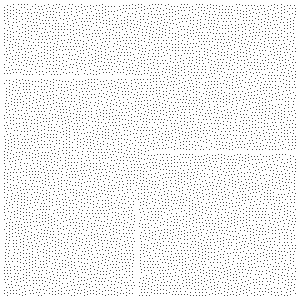

In [10]:
resultmap = np.ones([300,300])
 
for ln in range(len(visited)):
    resultmap[visited[ln][0]][visited[ln][1]] = 0.3
    
resultarray = (resultmap*255).astype(np.uint8)
imgres = Image.fromarray(resultarray)
imgres.save('resultmap1.png')    
Im(filename='resultmap1.png') 

In [11]:
visitedmap = map1
i = 1

for pt in visited:
    
    visitedmap[pt[0]][pt[1]] = 0.3
    imagearray1 = (visitedmap*255).astype(np.uint8)
    img1 = Image.fromarray(imagearray1)
    name = "v"+str(i)+'.png'
    img1.save(name)
    i += 1

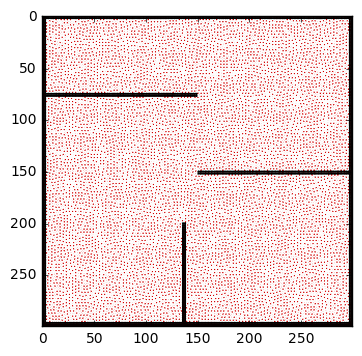

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(visit_check, cmap='hot',filterrad=20.0 ,interpolation='blackman')
plt.show()


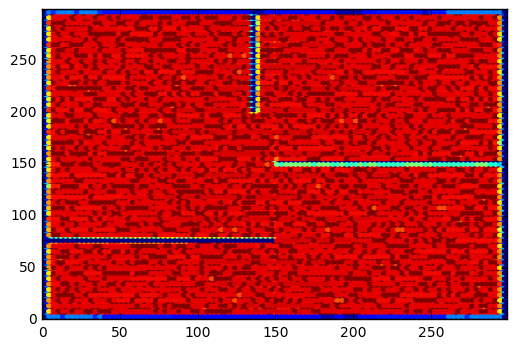

In [13]:
%matplotlib inline
def generate_x_y(prob_map):
    s = prob_map.shape
    x, y = np.meshgrid(np.arange(s[0]), np.arange(s[1]))
    return x.ravel(), y.ravel()

def heatmap(prob_map):
    x, y = generate_x_y(prob_map)
    plt.figure()
    plt.hexbin(x, y, C=prob_map.ravel())

probs = visit_check
heatmap(probs)
plt.show()

In [14]:
def arraysum(i,j,inputarray):
    sum1 = 0
    window_size = 4
    for a in range(window_size):
        for b in range(window_size):
            if((i+a)<300 and (j+b)<300):
                if(inputarray[i+a][j+b]!=1):
                    sum1 = sum1 + inputarray[i+a][j+b]
            
    return sum1
        
def heatmapfunc(i,j,sumele,heatmap):
    for ind in range(4):
        for jind in range(4):
            if(int(i+ind)<300 and int(j+jind)<300):
                heatmap[int(i+ind)][int(j+jind)]=sumele
            
    return heatmap

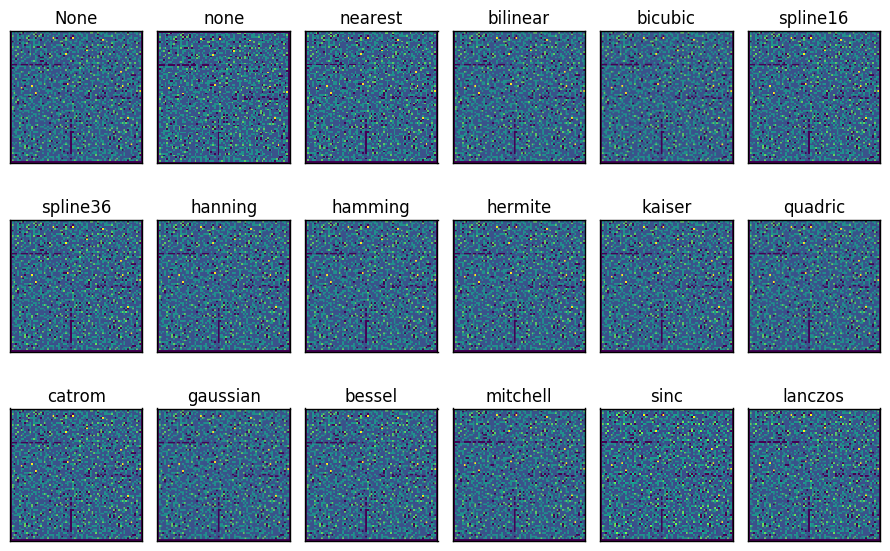

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

heatmap = np.zeros([300,300])

for i in range(int(len(heatmap)/4)):
    for j in range(int(len(heatmap)/4)):
        if(4*i<300 and 4*j<300):
            s = arraysum(4*i,4*j,resultmap)
            heatmap = heatmapfunc(4*i,4*j,s,heatmap)   


methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(heatmap, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()